In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from skimage import measure, io
#from skimage.color import label2rgb
#from skimage.morphology import opening, closing, disk
import matplotlib.patches as mpatches
from alberte_klara_lib import do_design, plot_map_three, plot_map_one, shiftedColorMap, do_design_timetrend
from alberte_klara_lib import n_int_max, n_ext_max, theta_grid, phi_grid, SAA_extent

In [3]:
m_int = np.loadtxt('ready_oersted_data\int_model_time_parameters')
m_ext = np.loadtxt('ready_oersted_data\ext_model_time_parameters')
m = np.concatenate((m_int, m_ext))

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\e'
C:\Users\alber\AppData\Local\Temp\ipykernel_29976\979251285.py:1: SyntaxWarning: invalid escape sequence '\i'
  m_int = np.loadtxt('ready_oersted_data\int_model_time_parameters')
C:\Users\alber\AppData\Local\Temp\ipykernel_29976\979251285.py:2: SyntaxWarning: invalid escape sequence '\e'
  m_ext = np.loadtxt('ready_oersted_data\ext_model_time_parameters')


In [5]:
time_grad_column = pd.read_csv('ready_oersted_data/time_grad_oersted.csv')['time_grad']

n_evals = len(theta_grid)
print(n_evals)

# Generate evenly spaced numbers within the range of values in the time_grad column
time_grad_random = np.linspace(time_grad_column.iloc[0], time_grad_column.iloc[-1], n_evals)
print(time_grad_random.shape)


40320
(40320,)


# Evaluating the Swarm model at surface of Earth

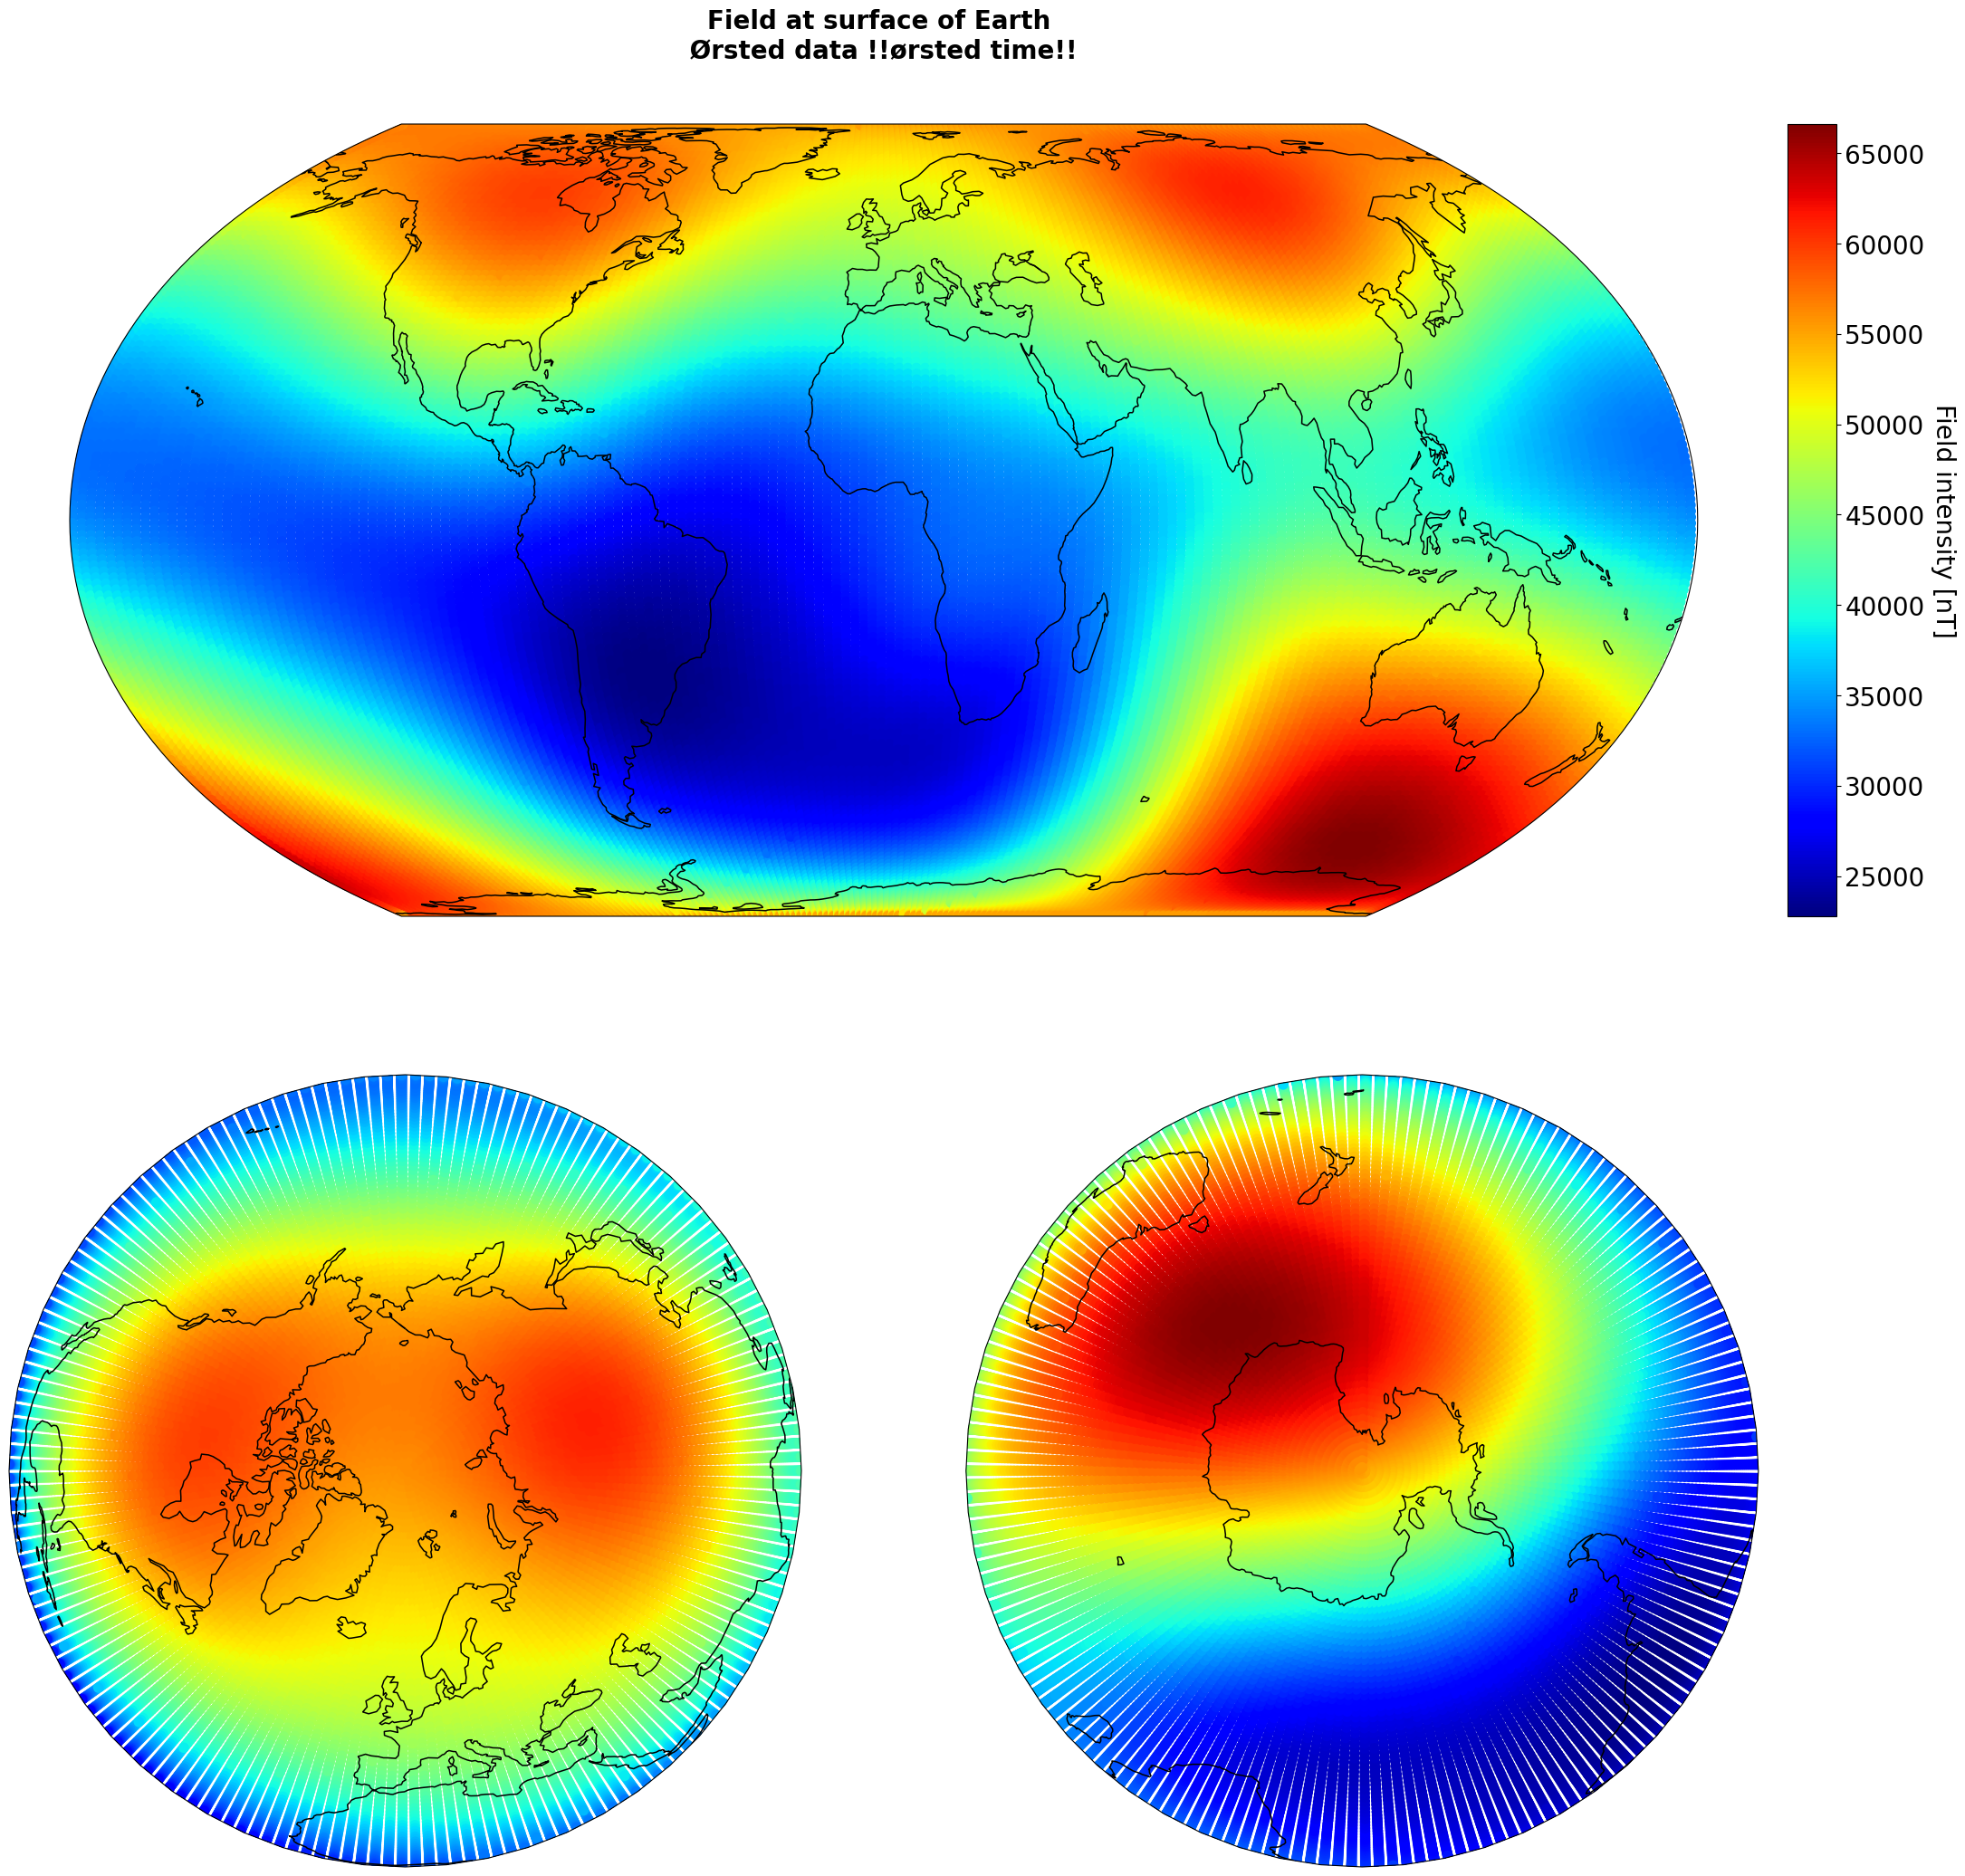

In [6]:
radius_surface = 6378
G_down_radius, G_down_theta, G_down_phi = do_design_timetrend(radius_surface, theta_grid, phi_grid, n_int_max, n_ext_max, time_grad_random)

d_down_r = G_down_radius @ m
d_down_theta = G_down_theta @ m
d_down_phi = G_down_phi @ m

# field intensity
F_down = np.sqrt(d_down_r**2 + d_down_theta**2 + d_down_phi**2)

plot_map_three(F_down, phi_grid, theta_grid, sat = 'oersted', title = 'Field at surface of Earth', label = 'Field intensity [nT]')

# Evaluating at CMB

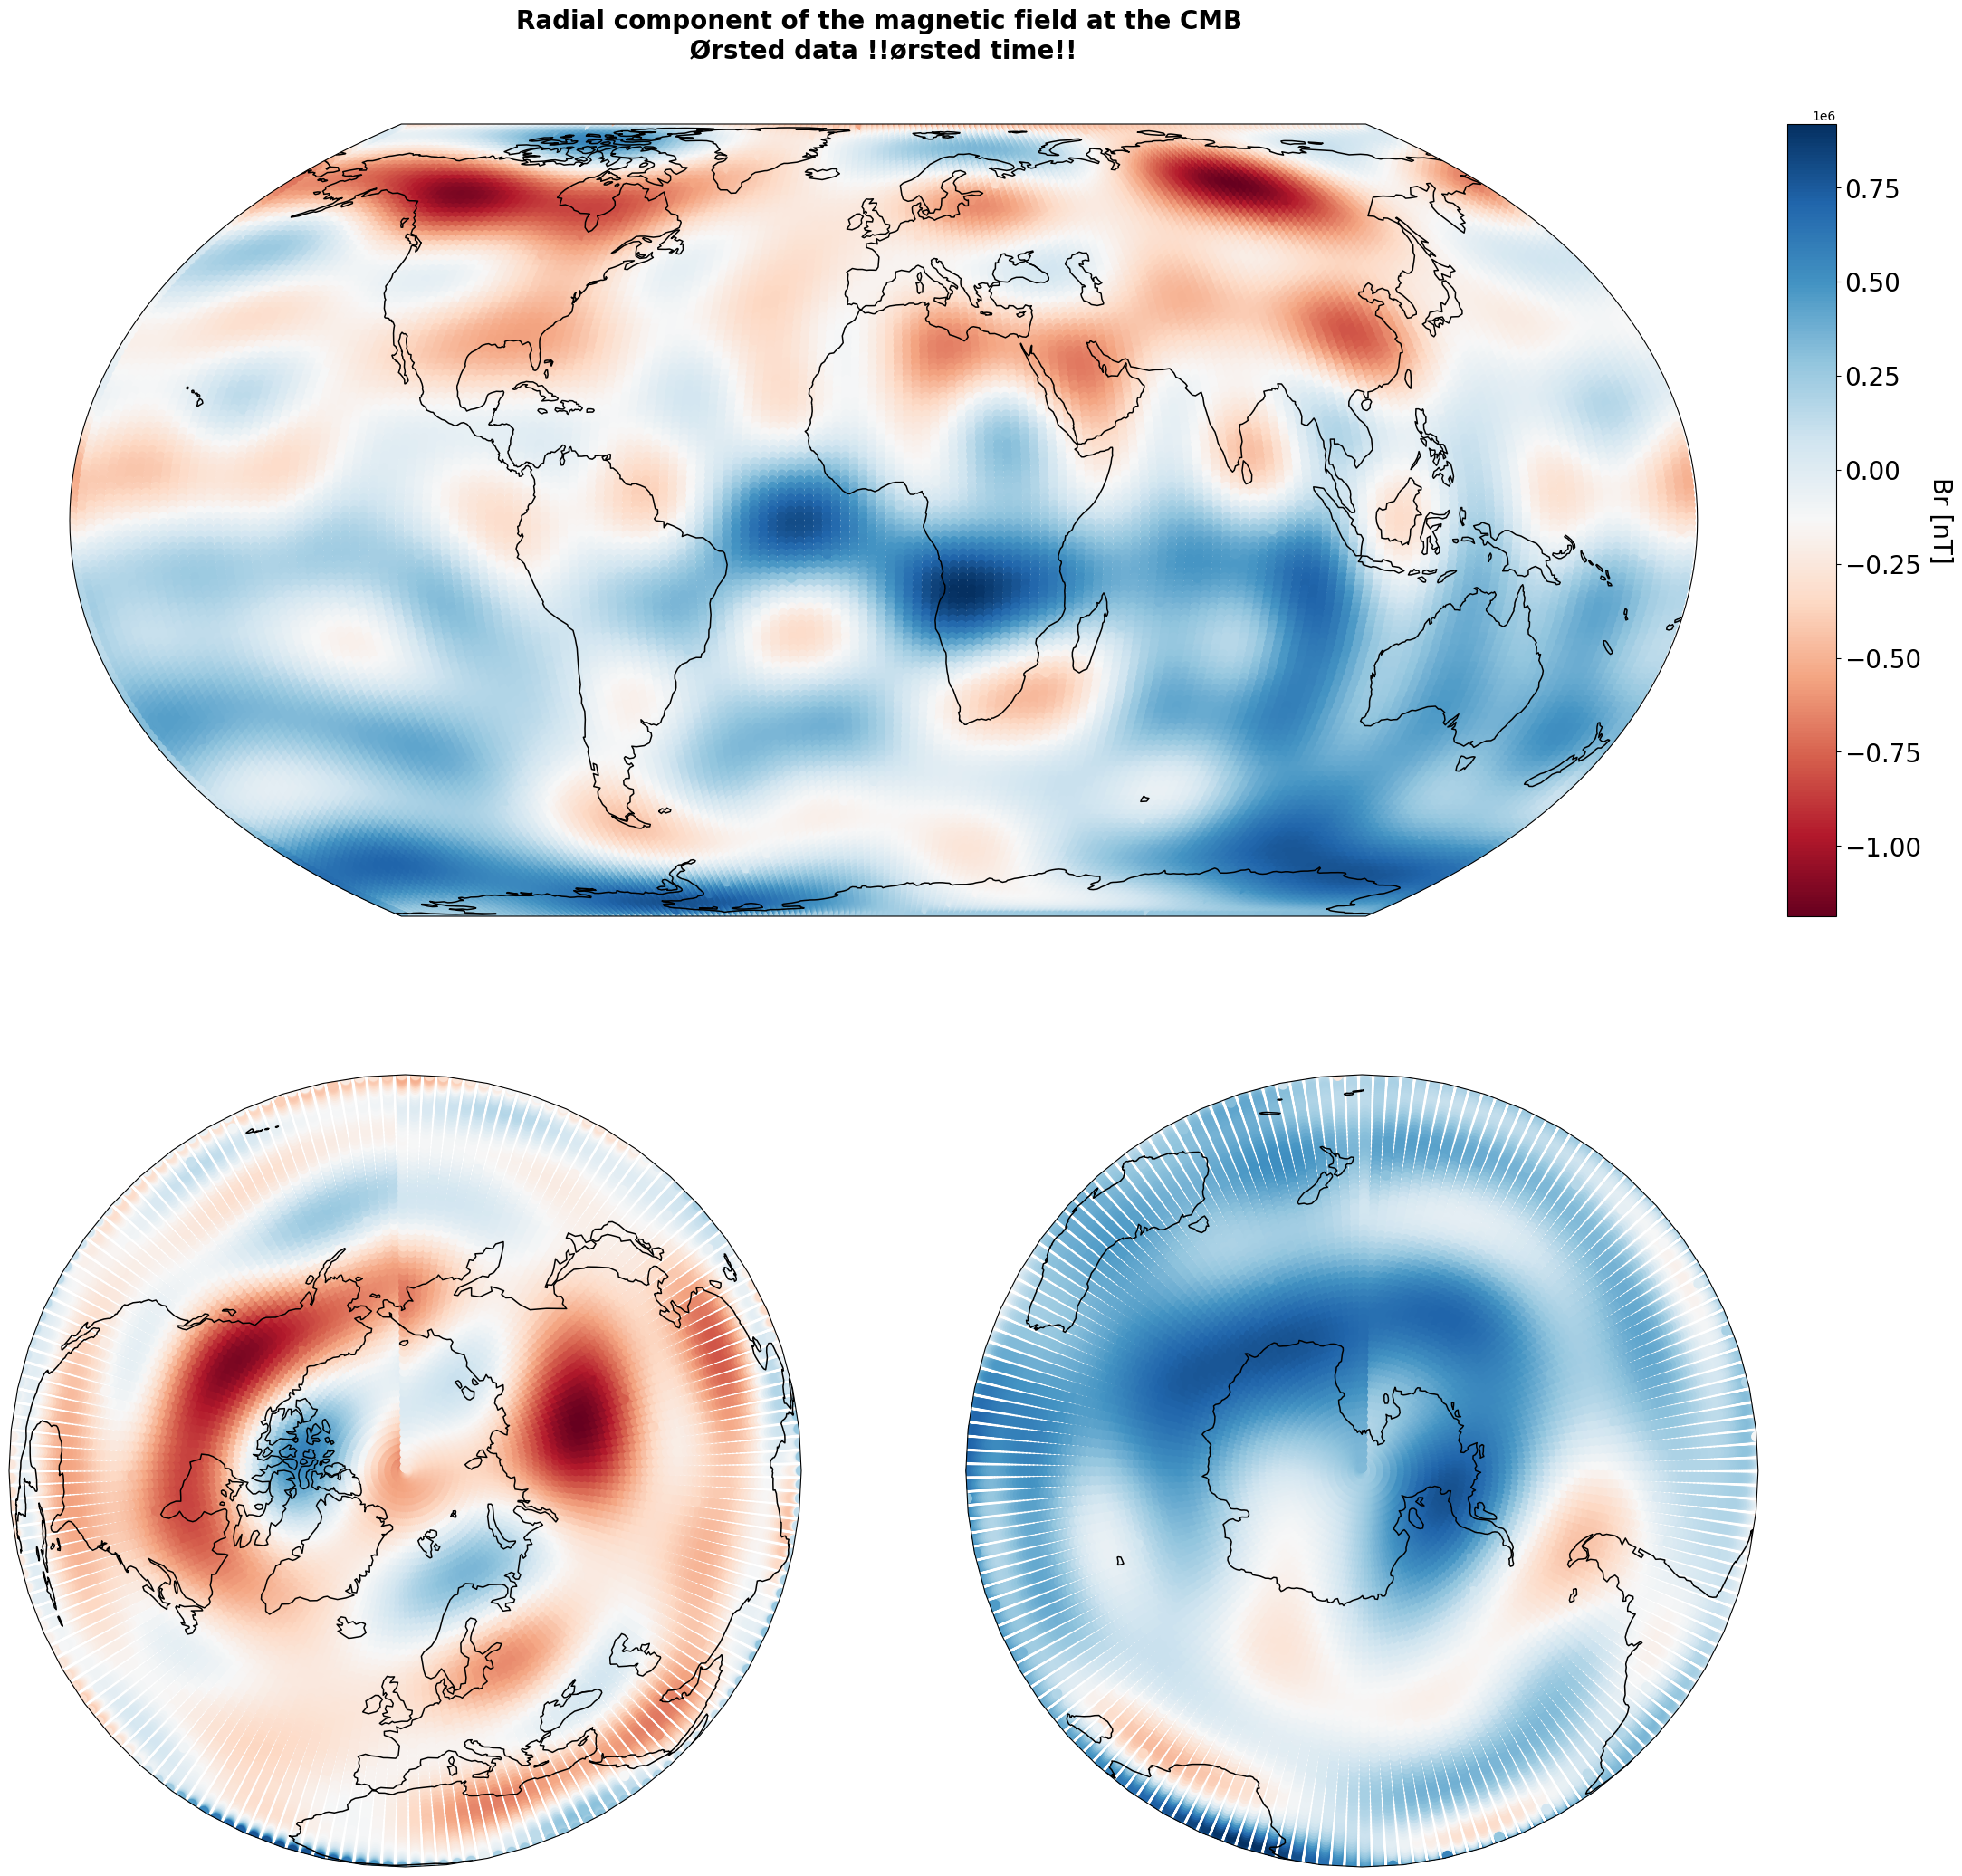

In [7]:
radius_CMB = 3485.  # km, core-mantle boundary

G_CMB_radius, G_CMB_theta, G_CMB_phi = do_design_timetrend(radius_CMB, theta_grid, phi_grid, n_int_max, n_ext_max, time_grad_random)

d_CMB_r = G_CMB_radius @ m
d_CMB_theta = G_CMB_theta @ m
d_CMB_phi = G_CMB_phi @ m

plot_map_three(d_CMB_r, phi_grid, theta_grid, sat = 'oersted', title = 'Radial component of the magnetic field at the CMB', label = 'Br [nT]', colors = 'RdBu')

# Magnetic field contour lines

In [8]:
# Mesh grids needed to plot with ax.contour
theta = np.linspace(0., 180., num=181)  # colatitude in degrees
phi = np.linspace(-180., 180., num=361)  # longitude in degrees

phi_meshgrid, theta_meshgrid = np.meshgrid(phi, theta)

At surface of Earth

In [9]:

radius_meshgrid = radius_surface*np.ones(phi_meshgrid.shape)

G_surface_radius, G_surface_theta, G_surface_phi = do_design_timetrend(radius_meshgrid.ravel(), theta_meshgrid.ravel(), phi_meshgrid.ravel(), n_int_max, n_ext_max, time_grad_random)
d_surface_r = G_surface_radius @ m
d_surface_t = G_surface_theta @ m
d_surface_p = G_surface_phi @ m

F_surface = np.sqrt(d_surface_r**2 + d_surface_t**2 + d_surface_p**2).reshape(theta_meshgrid.shape)

levels = len(np.arange(np.min(F_surface), np.max(F_surface), 500)) # contours of 500nT

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, F_surface.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'jet', levels = levels)
clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Field intensity at surface of the Earth \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 

c:\Users\alber\anaconda3\envs\EPM\Lib\site-packages\chaosmagpy\model_utils.py:787: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


ValueError: cannot reshape array of size 40320 into shape (65341,1)

At CMB

In [7]:

radius_meshgrid = radius_CMB*np.ones(phi_meshgrid.shape)

G_CMB_radius, G_CMB_theta, G_CMB_phi = do_design(radius_meshgrid.ravel(), theta_meshgrid.ravel(), phi_meshgrid.ravel(), n_int_max, n_ext_max)
d_CMB_r = G_CMB_radius @ m

c:\Users\klara\anaconda3\envs\bachelors\Lib\site-packages\chaosmagpy\model_utils.py:787: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n')

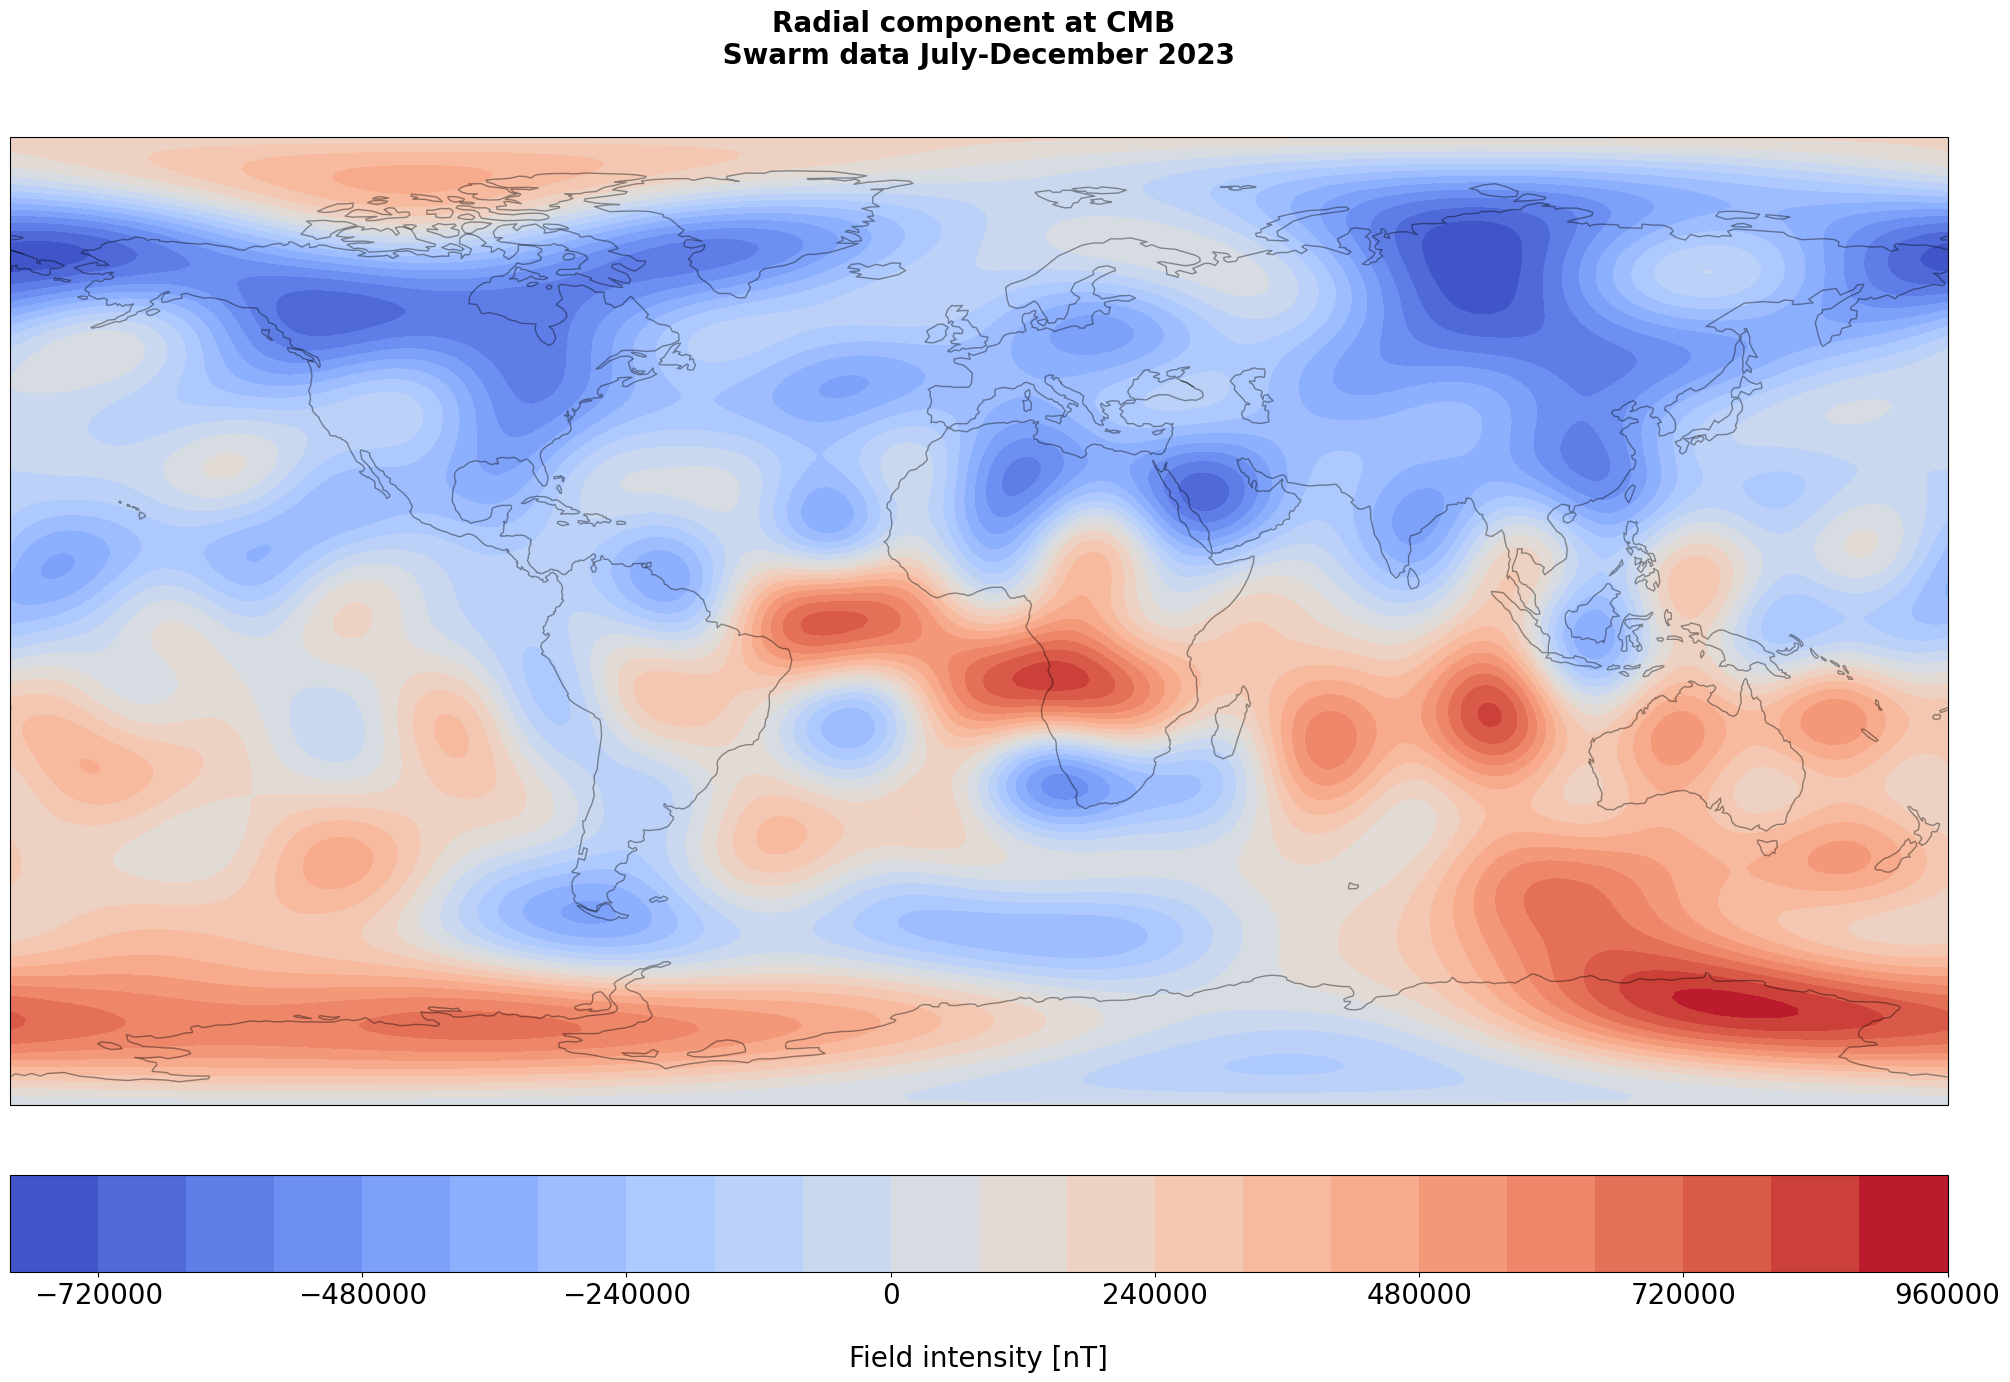

In [8]:
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'coolwarm', levels = 25)
clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 

# fig = plt.figure(figsize=(25, 25))

# # Setup a global EckertIII map with faint coastlines.
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.EqualEarth())
# ax.set_global()
# ax.coastlines('110m', alpha=0.2)
# filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap='RdBu')
# line_c = ax.contour(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), levels=filled_c.levels, colors=['black'], transform=ccrs.PlateCarree())
# fig.colorbar(filled_c, orientation='horizontal')

# plt.show()

# Zooming in on SAA

In [9]:
theta_SAA = np.linspace(SAA_extent[0][0], SAA_extent[0][1], num=181)  # colatitude in degrees
phi_SAA = np.linspace(SAA_extent[1][0], SAA_extent[1][1], num=361)  # longitude in degrees

phi_grid_SAA, theta_grid_SAA = np.meshgrid(phi_SAA, theta_SAA)
radius_grid_SAA = radius_CMB*np.ones(phi_grid_SAA.shape)

G_CMB_radius_SAA, G_CMB_theta_SAA, G_CMB_phi_SAA = do_design(radius_grid_SAA.ravel(), theta_grid_SAA.ravel(), phi_grid_SAA.ravel(), n_int_max, n_ext_max)
d_CMB_r_SAA = G_CMB_radius_SAA @ m


Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n')

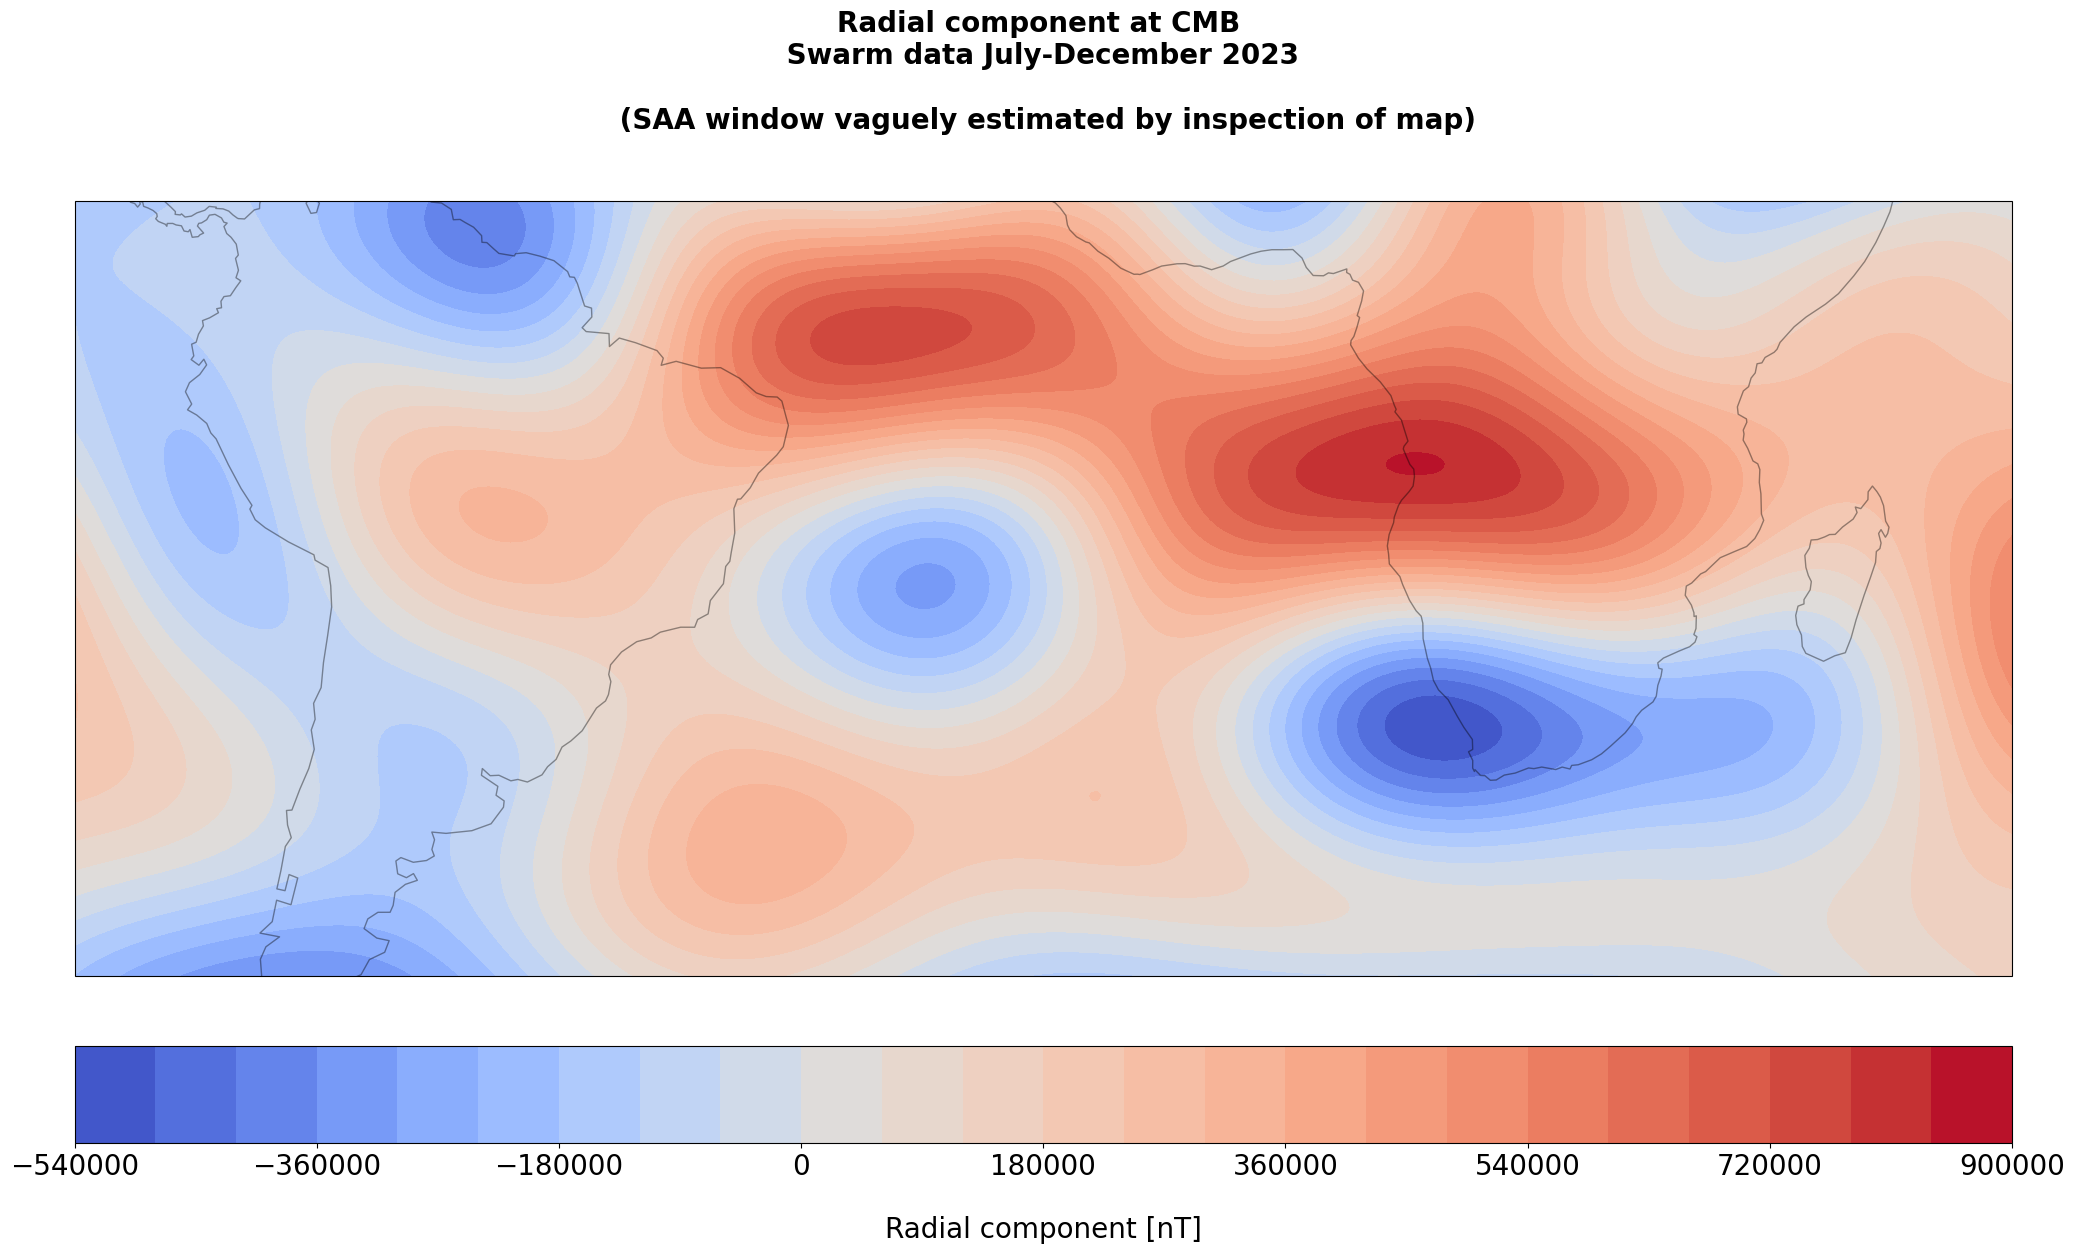

In [10]:
# data is heavily biased so we will have to shift the color bar if it is to be centred at zero
# THE FOLLOWING THREE LINES SHOULD ONLY BE RUN ONCE. Restart kernel to run again
# orig_cmap = matplotlib.cm.coolwarm
# mid = 1 - max(d_CMB_r_SAA) / (max(d_CMB_r_SAA) + abs(min(d_CMB_r_SAA)))
# shifted_cmap = shiftedColorMap(orig_cmap, midpoint = round(mid, 2), stop = 1.)


# ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat
# plot_map_one(d_CMB_r_SAA, phi_grid_SAA.ravel(), theta_grid_SAA.ravel(), 'swarm', 'title', 'Radial component [nT]', colors = shifted_cmap)




fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

# SAA quantification with BLOB analysis tools from image analysis 
Deriving amplitude and distribution of SAA field
We consider the SAA area as an image by having every observation point be a pixel in the image. Rounding to the nearest of a specific magnitude will leave discretely distributed data. Morphological operations can help neglect the data, which is not considered to be associated to the SAA. The BLOB analysis tools provide smooth deriviation of the pixel-wise area of a BLOB. Knowing the radius to the Earth's core at the CMB, the distance between to adjects pixels can be estimated in the theta and phi direction, respectively.

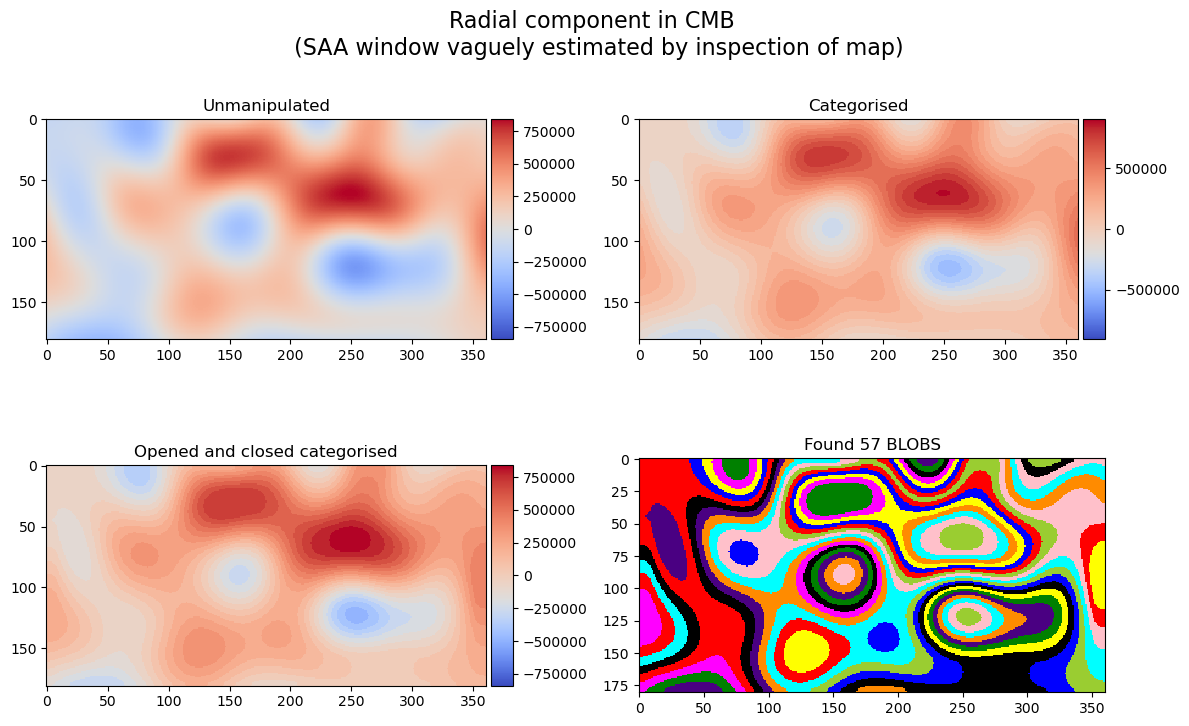

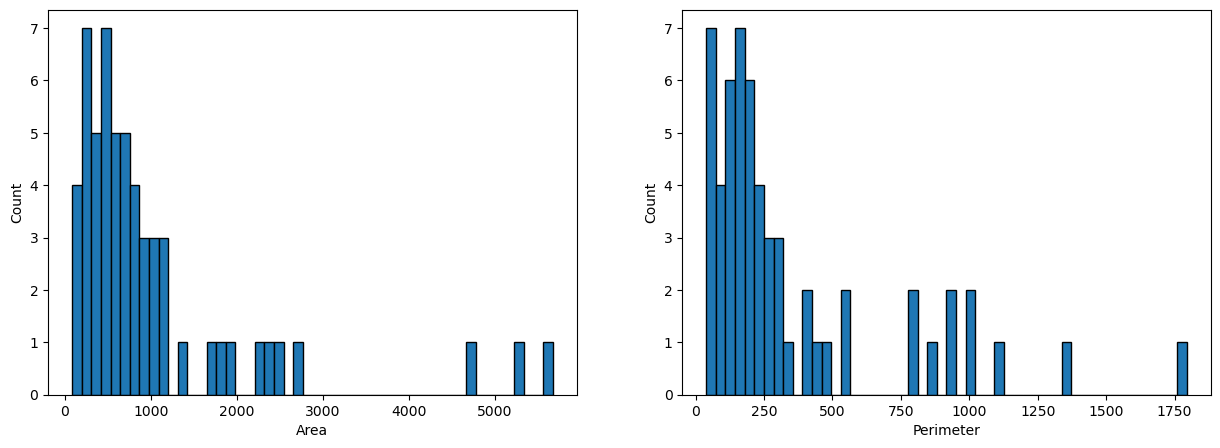

In [13]:
# Categorise radial data by their nearest xx (diy contour)

def roundup(x):
    return np.ceil(x / 70000.0) * 70000


d_CMB_r_SAA_categorised = roundup(d_CMB_r_SAA).reshape(theta_grid_SAA.shape)

# closed = closing(d_CMB_r_SAA_categorised, disk(16))
# opened = opening(closed, disk(23))
# closed_opened = opened

# closed = closing(d_CMB_r_SAA_categorised, disk(20))
# opened = opening(closed, disk(23))
# closed_opened = opened
opened = opening(d_CMB_r_SAA_categorised, disk(8))
closed = closing(opened, disk(3))
opened = opening(closed, disk(9))
closed = closing(opened, disk(6))
closed_opened = opened

label_d_CMB_r_SAA = measure.label(closed_opened)
n_labels = label_d_CMB_r_SAA.max()

plt.figure(figsize=(12,10))
plt.suptitle('Radial component in CMB \n (SAA window vaguely estimated by inspection of map)', fontsize=16, y=0.86)
plt.subplot(2,2,1)
plt.title('Unmanipulated')
io.imshow(d_CMB_r_SAA.reshape(theta_grid_SAA.shape), cmap = 'coolwarm')
plt.subplot(2,2,2)
plt.title('Categorised')
io.imshow(d_CMB_r_SAA_categorised, cmap = shifted_cmap)
plt.subplot(2,2,3)
plt.title('Opened and closed categorised')
io.imshow(closed_opened, cmap = shifted_cmap)
plt.subplot(2,2,4)
plt.title('Found ' + str(n_labels) + ' BLOBS')
io.imshow(label2rgb(label_d_CMB_r_SAA))
io.show()



d_CMB_r_SAA_props = measure.regionprops(label_d_CMB_r_SAA)
areas = np.array([prop.area for prop in d_CMB_r_SAA_props])
perimeters = np.array([prop.perimeter for prop in d_CMB_r_SAA_props])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(areas, edgecolor = 'black', bins=50)
plt.xlabel('Area')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(perimeters, edgecolor = 'black', bins = 50)
plt.xlabel('Perimeter')
plt.ylabel('Count')
plt.show()


Filter the image based on BLOB properties: perimeter, area?

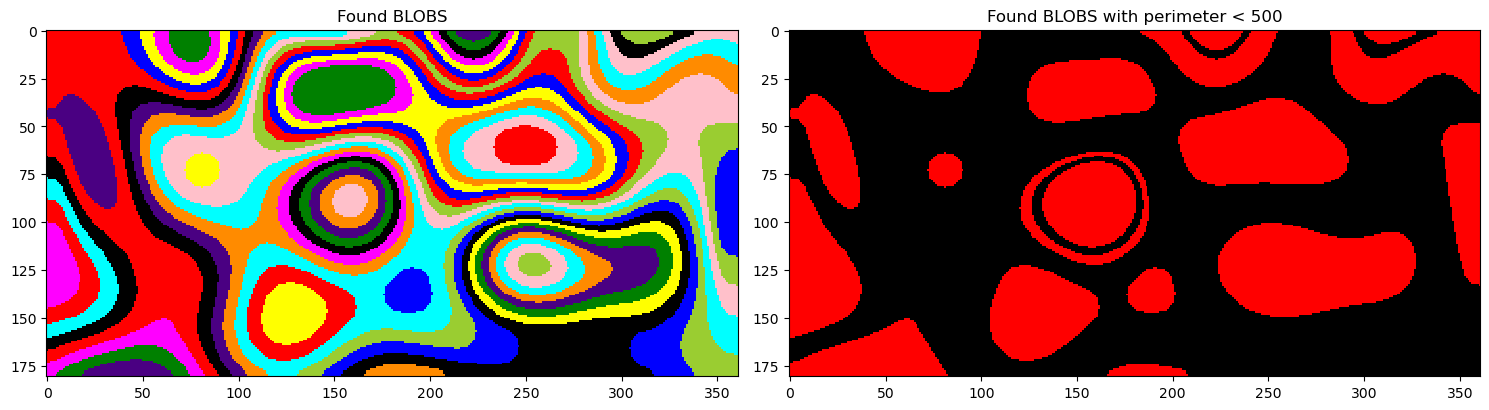

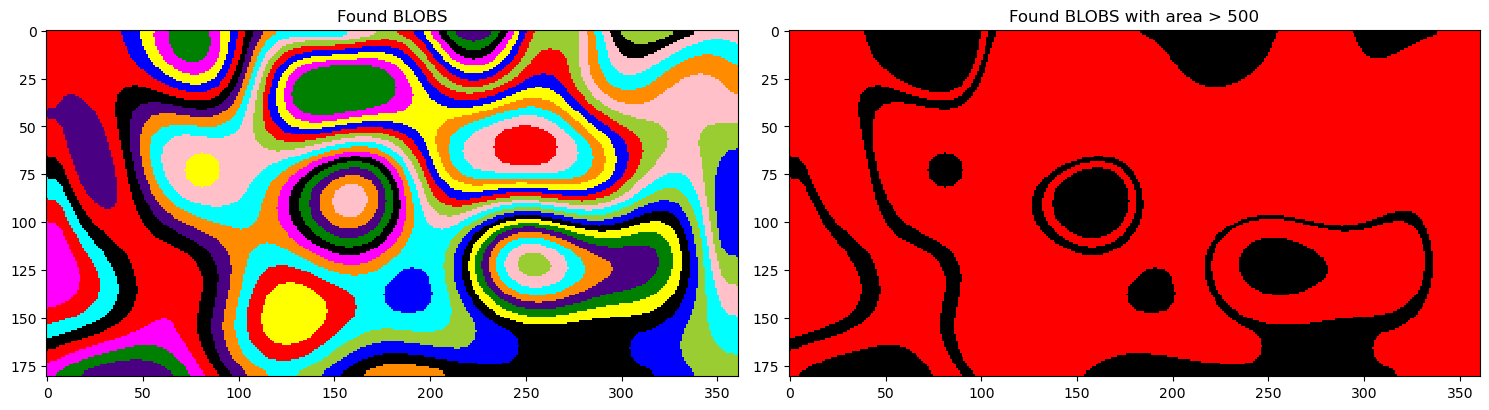

In [126]:
max_perimeter = 500

label_img_filter = label_d_CMB_r_SAA.copy()
for region in d_CMB_r_SAA_props:
	# Find the areas that do not fit our criteria
	if region.perimeter > max_perimeter:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0

i_perimeter = label_img_filter > 0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Found BLOBS')
io.imshow(label2rgb(label_d_CMB_r_SAA))
plt.subplot(1,2,2)
plt.title('Found BLOBS with perimeter < ' + str(max_perimeter))
io.imshow(label2rgb(i_perimeter))
plt.show()



min_area = 500
label_img_filter = label_d_CMB_r_SAA.copy()
for region in d_CMB_r_SAA_props:
	# Find the areas that do not fit our criteria
	if region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0

i_area = label_img_filter > 0

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Found BLOBS')
io.imshow(label2rgb(label_d_CMB_r_SAA))
plt.subplot(1,2,2)
plt.title('Found BLOBS with area > ' + str(min_area))
io.imshow(label2rgb(i_area))
plt.show()

# SAA quantification by mean along longitude
Look at mean values of field intensity in longitude (at Earths surface)

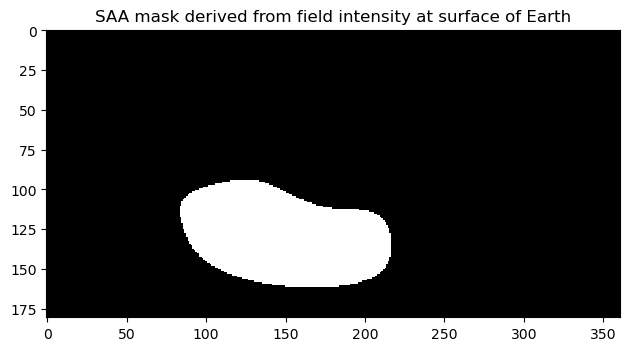

In [216]:
F_surface = np.sqrt(d_surface_r**2 + d_surface_t**2 + d_surface_p**2).reshape(theta_meshgrid.shape)

F_mean_long = np.mean(F_surface, axis = 1) # mean field intensity in along longitude axis
F_mean_long_reshaped = F_mean_long.reshape(-1, 1)
F_mean_long_extended = np.repeat(F_mean_long_reshaped, 361, axis=1) # repeat average vector for easy comparison
mask = np.zeros(phi_meshgrid.shape)
mask[F_surface < F_mean_long_extended*0.75] = 1 # the anomaly is defined as field intensity less that 70% of the longitudinal mean

io.imshow(mask)
plt.title('SAA mask derived from field intensity at surface of Earth')
io.show()

# SAA extend defined at max/min lat and long, combined to corners of SAA "window"
indices = np.argwhere(mask)
colat1, colat2 = np.min(indices[:, 0]), np.max(indices[:, 0])
lon1, lon2 = np.min(indices[:, 1]), np.max(indices[:, 1])
SAA_window = np.array([[colat1, colat2], [lon1, lon2]]) # min lat, max lat, min lon, max lon
# print("Min lat:", SAA_window[0][0])
# print("Max lat:", SAA_window[0][1])
# print("Min lon:", SAA_window[1][0])
# print("Max lon:", SAA_window[1][1])
# print("Theta grid:\n", theta_meshgrid)
# print("Phi grid:\n", phi_meshgrid)

Text(0.5, 1.0, 'Longitude average-found SAA windown draw over radial component at CMB \n Swarm data July-December 2023 \n \n')

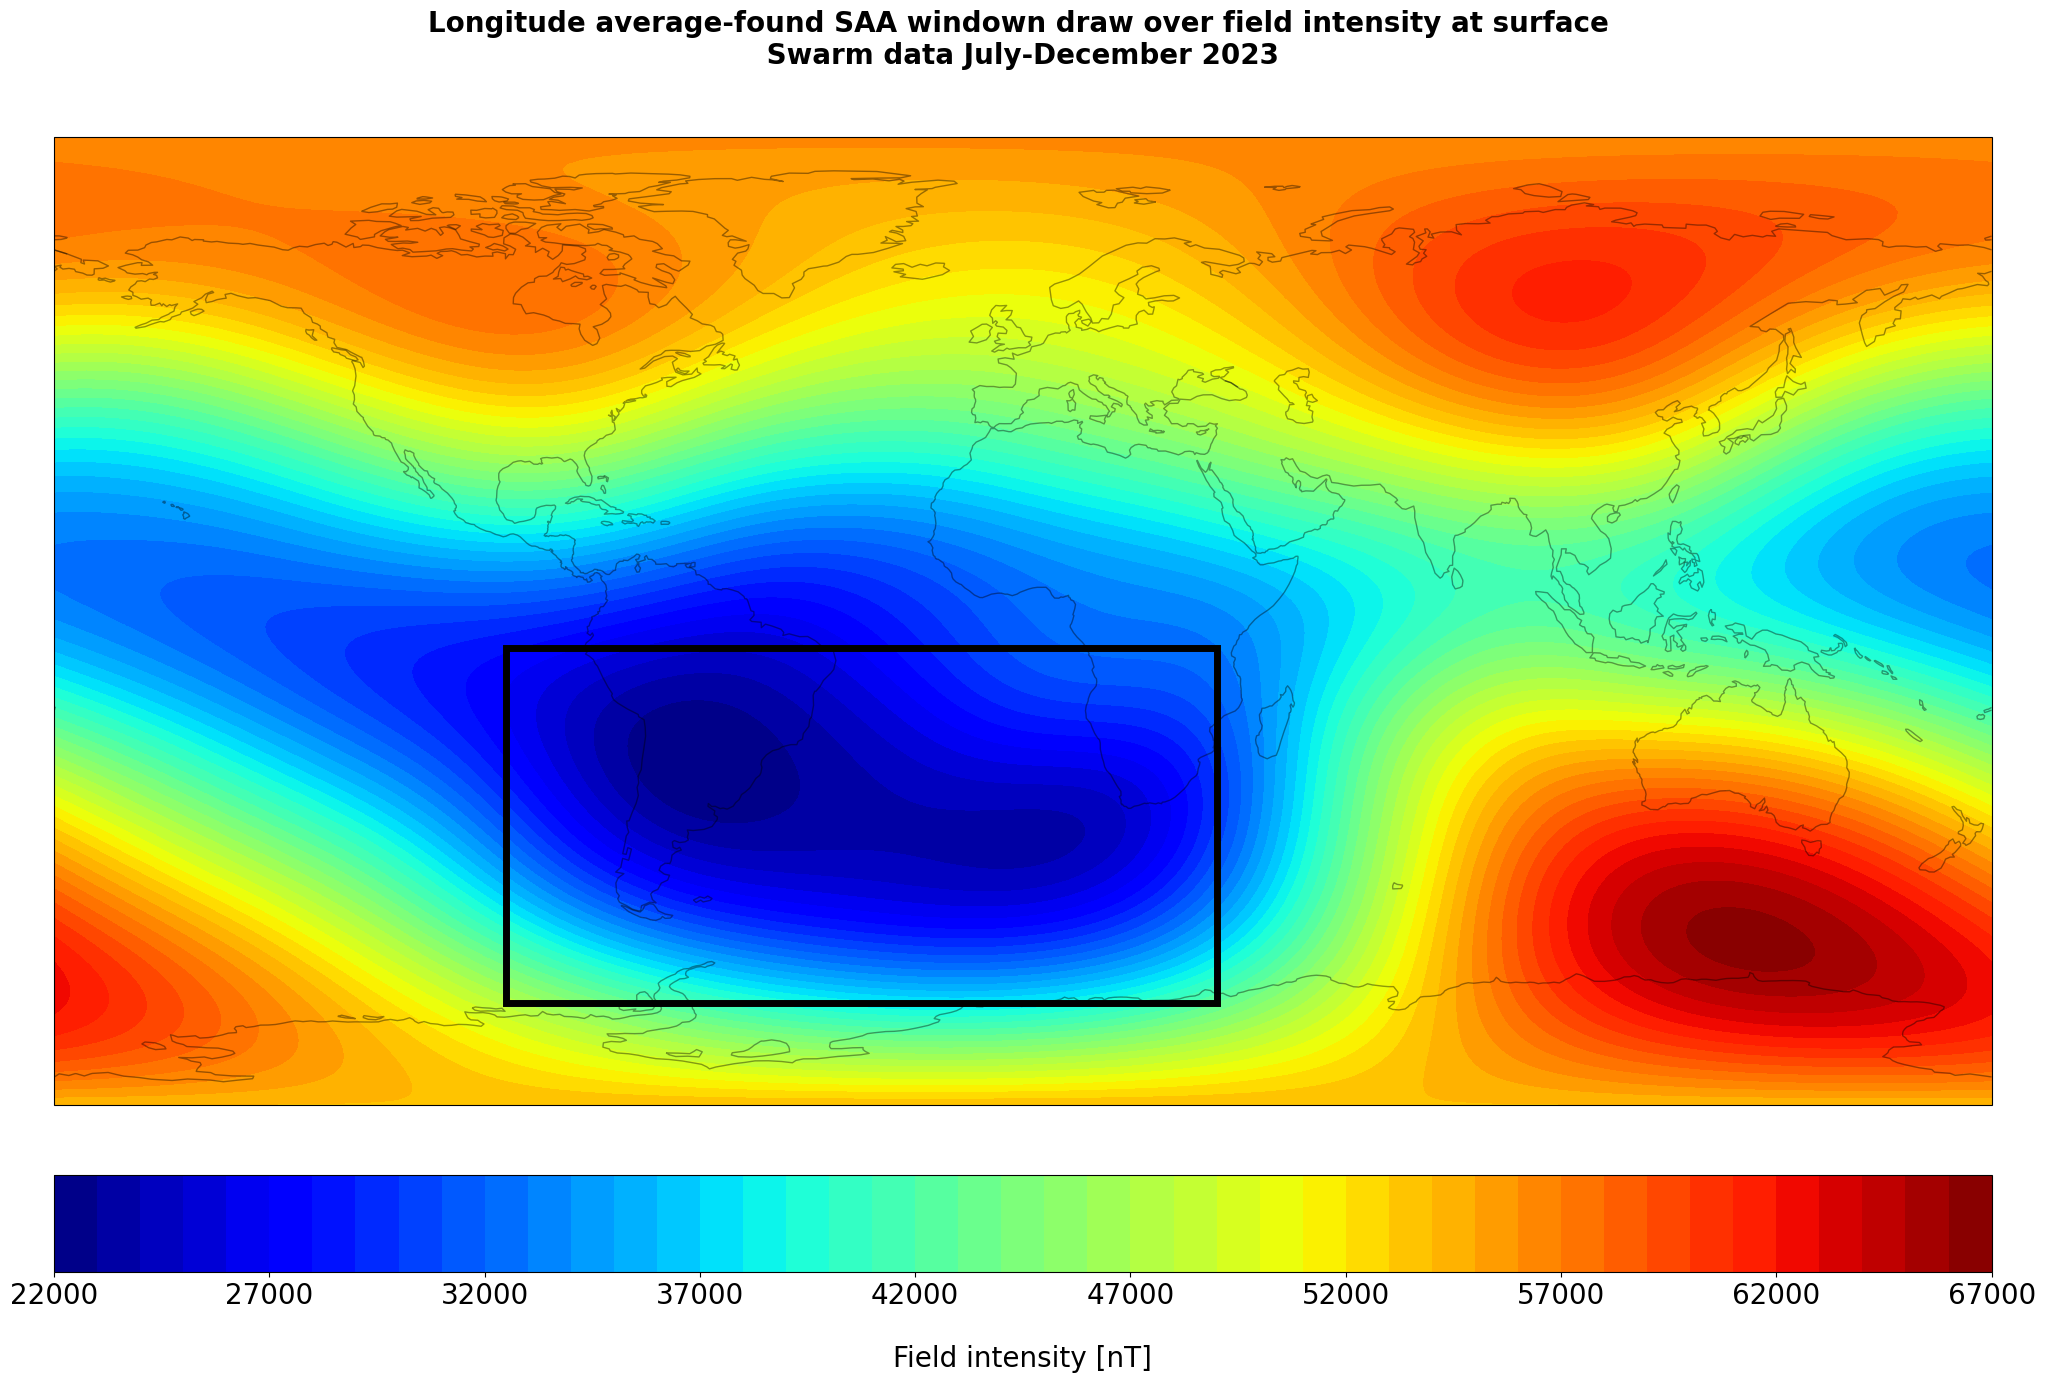

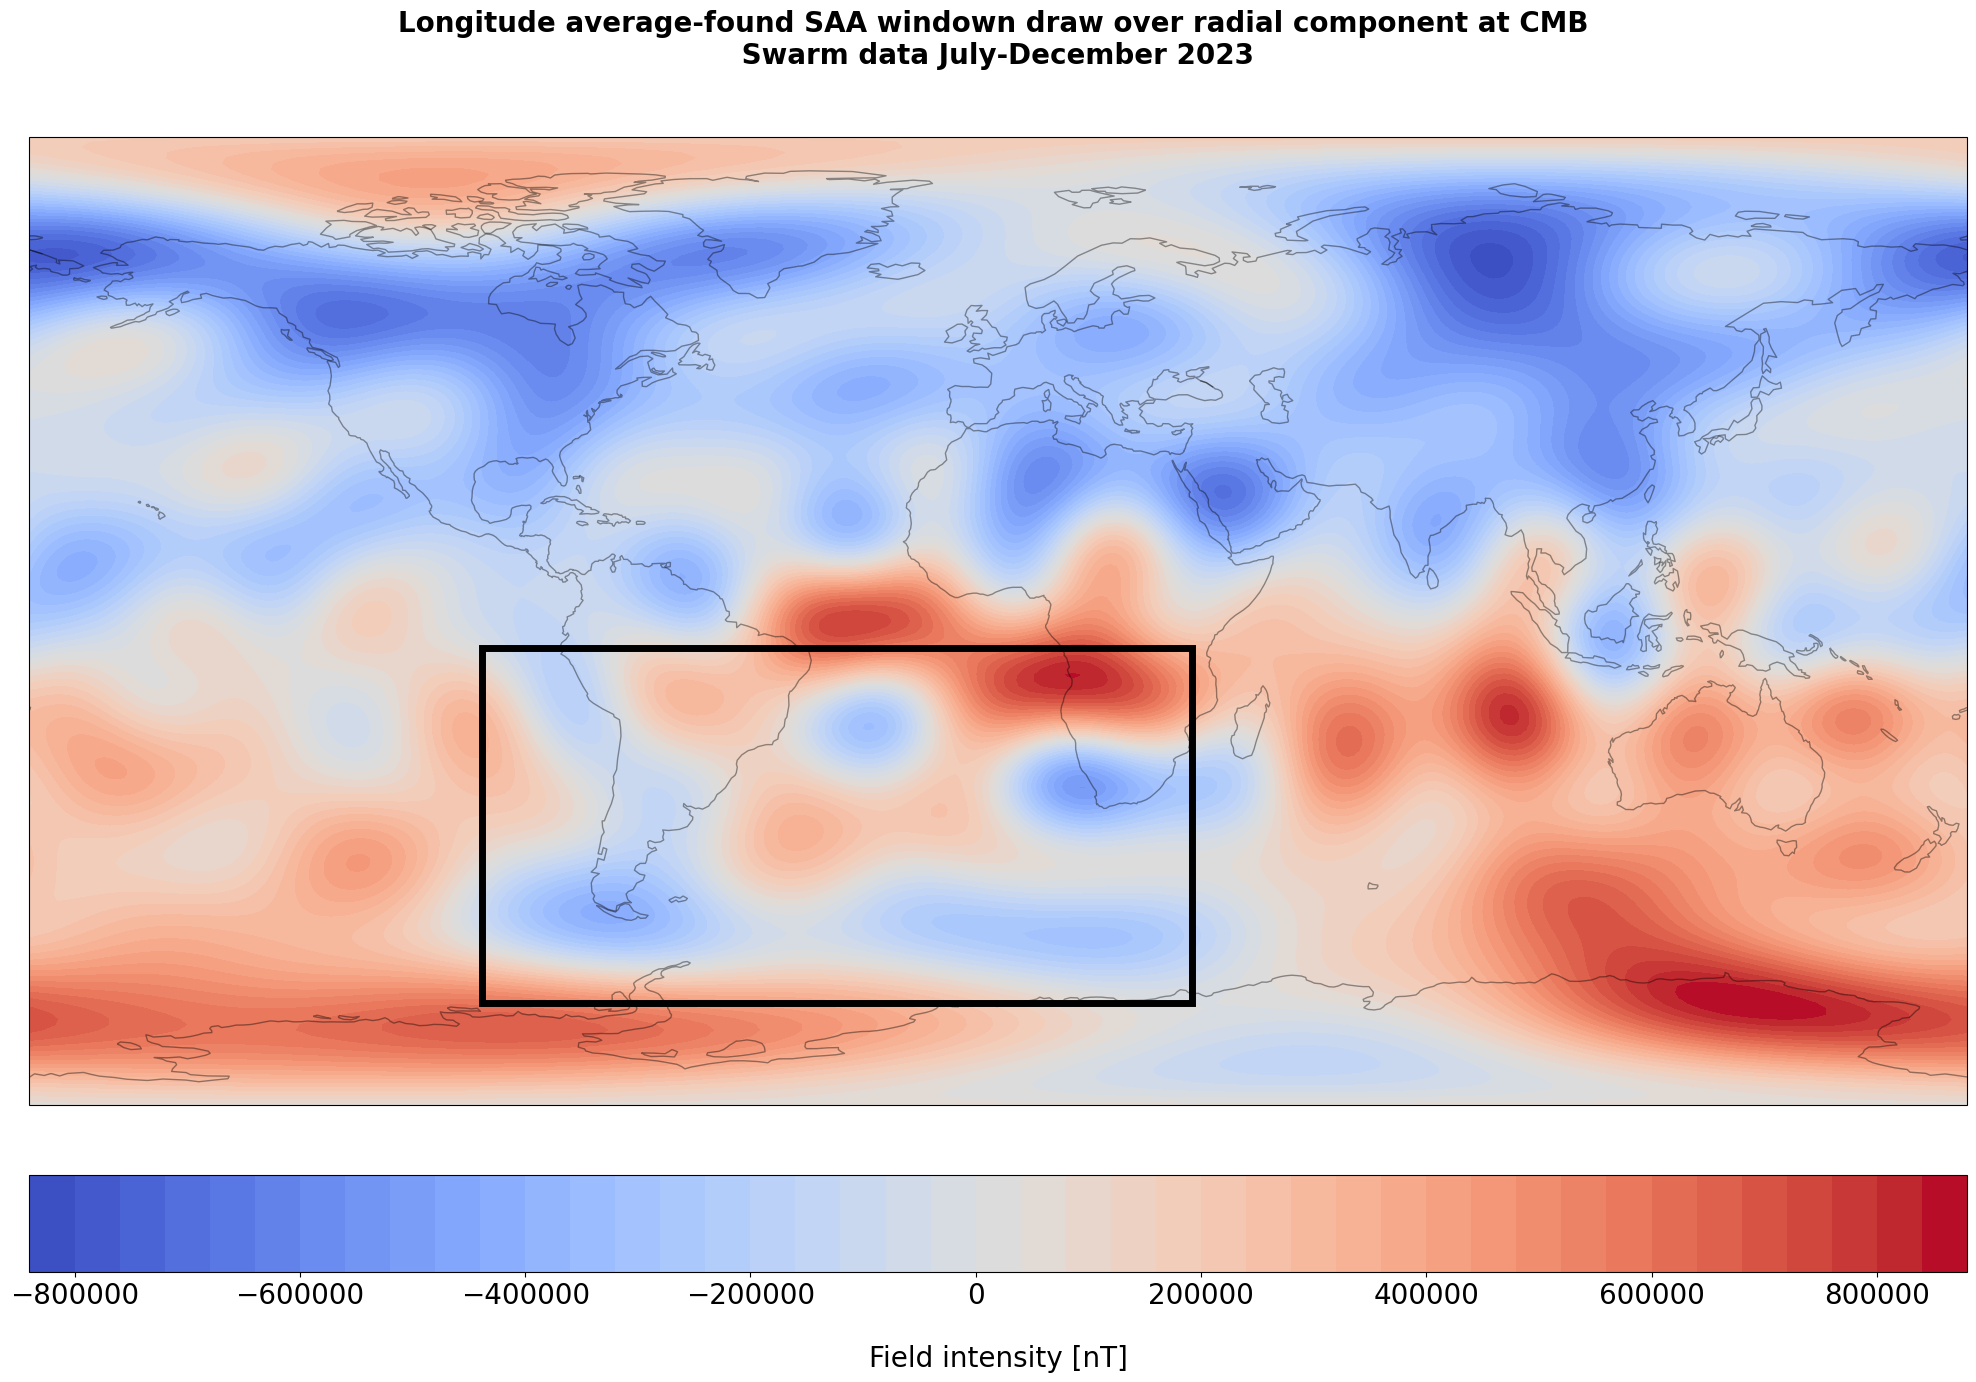

In [219]:
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, F_surface.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'jet', levels = 50)

rect = mpatches.Rectangle((SAA_window[1][0]-180, 90-SAA_window[0][1]), SAA_window[1][1] - SAA_window[1][0], SAA_window[0][1]-SAA_window[0][0], linewidth=5, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Longitude average-found SAA windown draw over field intensity at surface \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 



fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'coolwarm', levels = 50)

rect = mpatches.Rectangle((SAA_window[1][0]-180, 90-SAA_window[0][1]), SAA_window[1][1] - SAA_window[1][0], SAA_window[0][1]-SAA_window[0][0], linewidth=5, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Longitude average-found SAA windown draw over radial component at CMB \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 